In [71]:
import requests
import json
import pandas as pd
import numpy as np
import geopy as gd
from geopy.distance import geodesic
PinData_file= pd.read_excel('Locality_Pincode.xlsx')

In [78]:
pinlist= int(input(' Enter the Pincodes here: '))

 Enter the Pincodes here: 146110


In [79]:
PinData=PinData_file[ PinData_file['Pincode']==pinlist]
PinData['Districtname'].value_counts()

HOSHIARPUR    22
Name: Districtname, dtype: int64

In [80]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")
place_li = []
place_l = []
district_l= []
lat_l = []
long_l= []
place_list = list(PinData['Locality'])
district_list= list(PinData['Districtname'])
for i in range(0,len(place_list)):
    url= place_list[i]+" "+district_list[i]
    location = geolocator.geocode(url)
    try:
        
        address = location[0].split(',')
        place_li.append(place_list[i])
        place_l.append(address[0])
        district_l.append(address[2])
        lat_l.append(location.latitude)
        long_l.append(location.longitude)
    except:
        continue
               

In [81]:
place_cord= pd.DataFrame()
place_cord['Locality']=place_li

place_cord['Place']=place_l
place_cord['District']=district_l
place_cord['Latitude']=lat_l
place_cord['Longitude']=long_l

len(place_cord['Latitude'])

5

In [82]:
import seaborn as ss
import matplotlib.pyplot as plt
import numpy as nn
from sklearn.cluster import KMeans
x= place_cord.iloc[:,[3,4]].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++',max_iter = 300, n_init = 2, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 0, 0])

In [83]:
c1=kmeans.cluster_centers_[0]
c2=kmeans.cluster_centers_[1]

In [84]:
place_cord['Cluster']=y_kmeans
place_cord_clus =place_cord[ place_cord['Cluster']==0]
place_cord_clus

,Locality,Place,District,Latitude,Longitude,Cluster
0,Kharkan,SubCentre,NH503A,31.508472,76.052545,0
1,Mehlanwali,Primary Health Centre,NH503A,31.510126,75.992210,0
3,Mehlanwali,Primary Health Centre,NH503A,31.510126,75.992210,0
4,Kharkan,SubCentre,NH503A,31.508472,76.052545,0


In [85]:
place_cord_clus1 =place_cord[ place_cord['Cluster']==1]
place_cord_clus1

,Locality,Place,District,Latitude,Longitude,Cluster
2,Singhpur,Singhpur,Hoshiarpur,31.424305,76.016335,1


The Center of Pincode is 31.466802125  76.019356625


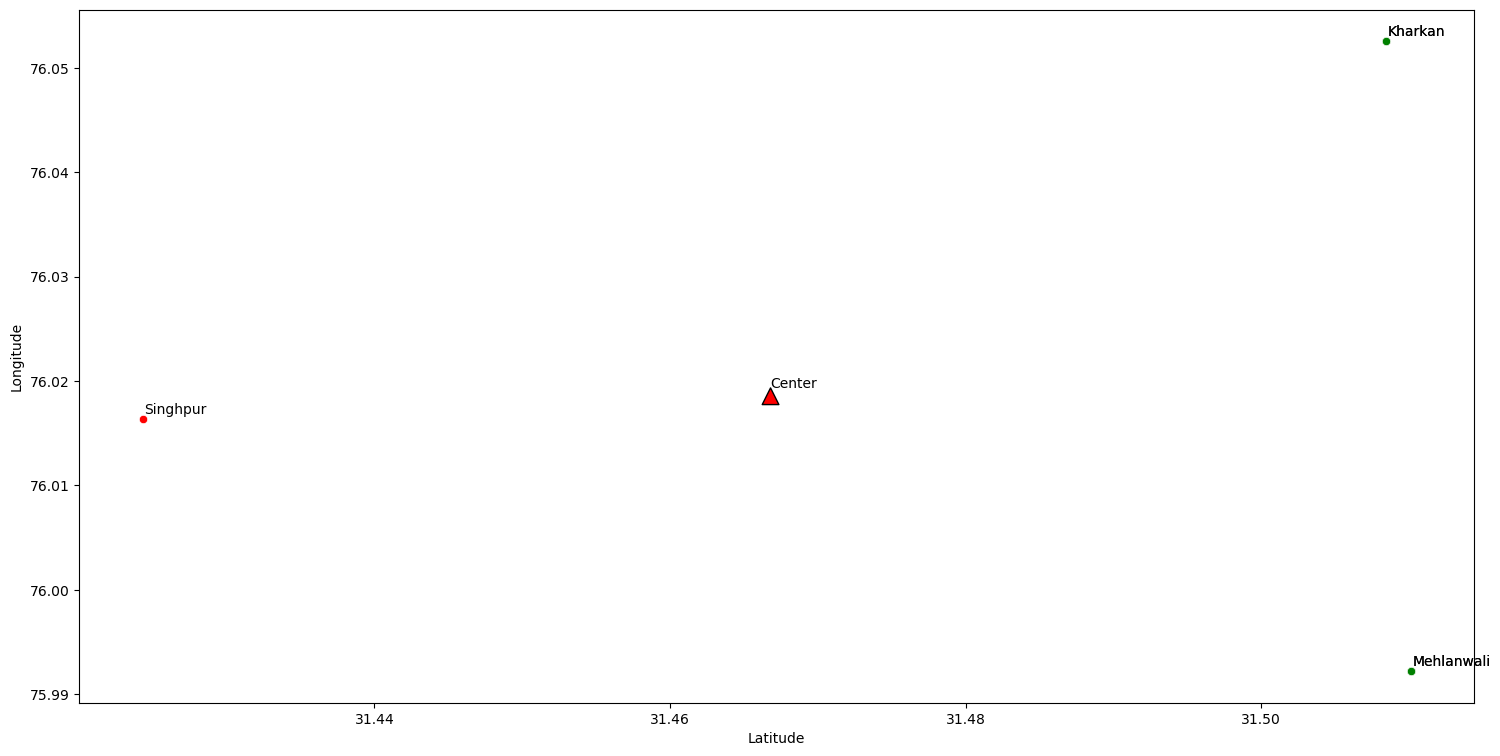

In [87]:
plt.figure(figsize=(18,9))
ss.scatterplot(x='Latitude',y='Longitude',data=place_cord,color='red')
ss.scatterplot(x='Latitude',y='Longitude',data=place_cord_clus,color='green')
for i in range(len(place_cord['Locality'])):
    p1= list(place_cord['Locality'])
    p2= list(place_cord['Latitude'])
    p3 =list(place_cord['Longitude'])
    plt.annotate(p1[i],(p2[i]+0.0001,p3[i]+0.0005))
    
if(geodesic((c1[0],c1[1]),(c2[0],c2[1]))>50):
    plt.annotate("Center",(c1[0],c1[1]),arrowprops = dict(facecolor ='green',shrink = 1.5 ))
    plt.annotate("Outliers",(c2[0],c2[1]),arrowprops = dict(facecolor ='red',shrink = 0.05 ))
    
    plt.show()
    print("The Center of Pincode is",c1[0],"",c1[1])
else:
    cc1= (c1[0]+c2[0])/2
    cc2= (c1[1]+c2[1])/2
    plt.annotate("Center",(cc1,cc2),arrowprops = dict(facecolor ='red',shrink = 0.05 ))
    print("The Center of Pincode is",cc1,"",cc2)
    

plt.show()
